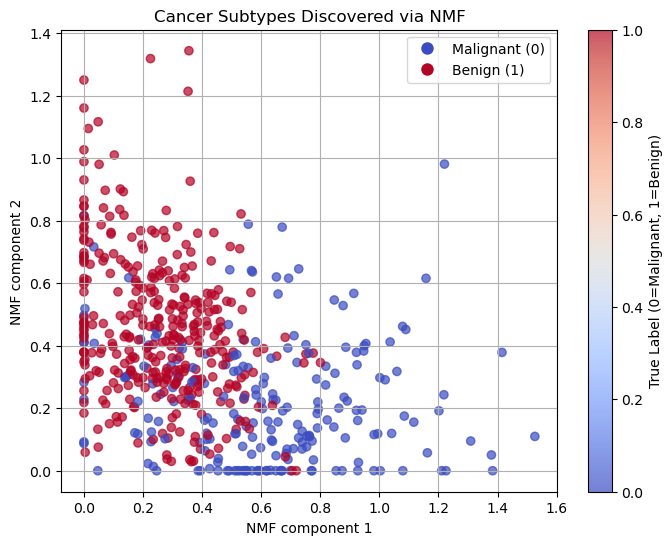

In [34]:
# Doctors and researchers often collect gene expression data from cancer patients. Each sample contains expression levels of thousands of genes. 
# Using NMF, we can reduce the dimensionality of this data and discover latent features, such as hidden cancer subtypes.
# We will use a sample gene expression dataset from sklearn.datasets.load_breast_cancer() for breast cacner diagnosis.
# The goal is to reduce the data into a few components (potentially representing cancer subtypes), and visualize them.

import numpy as np    
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Step 1: Load the breast cancer dataset
data = load_breast_cancer()
X = data.data  # shape (569, 30), 569 samples and 30 features per sample (e.g. texture, radius, symmetry of cell nuclei)
feature_names = data.feature_names
labels = data.target   # 0 = malignant, 1 = benign

# Step 2: Normalize the data (NMF requires non-negative inputs)
scaler = MinMaxScaler()                # Transforms all feature values to range between 0 and 1 
X_scaled = scaler.fit_transform(X)     # Fit the scaler to X and transform it

# Step 3: Apply NMF
n_components = 5     # reduce the data to 5 latent components
nmf = NMF(n_components=n_components, init='random', random_state=42, max_iter = 1000)  # Starts with random initial matrices
W = nmf.fit_transform(X_scaled)   # Patient-feature matrix - fits the NMF model to the input data - Shape (569 , 5) -
                                  # Shows how much each of the samples expresses each of the 5 components
H = nmf.components_               # Feature-pattern matrix - The learned matrix during training
                                  # Show how each of the 5 components is made up of the original 30 features

# Step 4: Cluster the reduced representation
kmeans = KMeans(n_clusters=2, random_state=42)   # initializes KMeans with 2 cluster for malignant and benign
clusters = kmeans.fit_predict(W)                 # Assigns each sample to one of two clusters

# Step 5: Visualize in 2D (using first two NMF components)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(W[:, 0], W[:, 1], c=labels, cmap='coolwarm', alpha=0.7) # plots a scatter plot for NMF components 1 and 2 on the x and y axes

# Legend manually
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Malignant (0)',
           markerfacecolor=plt.cm.coolwarm(0.0), markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Benign (1)',
           markerfacecolor=plt.cm.coolwarm(1.0), markersize=10)
]
plt.legend(handles=legend_elements)
plt.title("Cancer Subtypes Discovered via NMF")
plt.xlabel("NMF component 1")
plt.ylabel("NMF component 2")
plt.colorbar(label="True Label (0=Malignant, 1=Benign)")
plt.grid()
plt.show()




In [18]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')